<a href="https://colab.research.google.com/github/ikypakey/PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


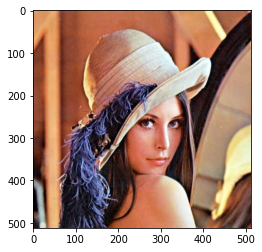

In [ ]:
img = cv.imread('/content/drive/MyDrive/img/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

<BarContainer object of 256 artists>

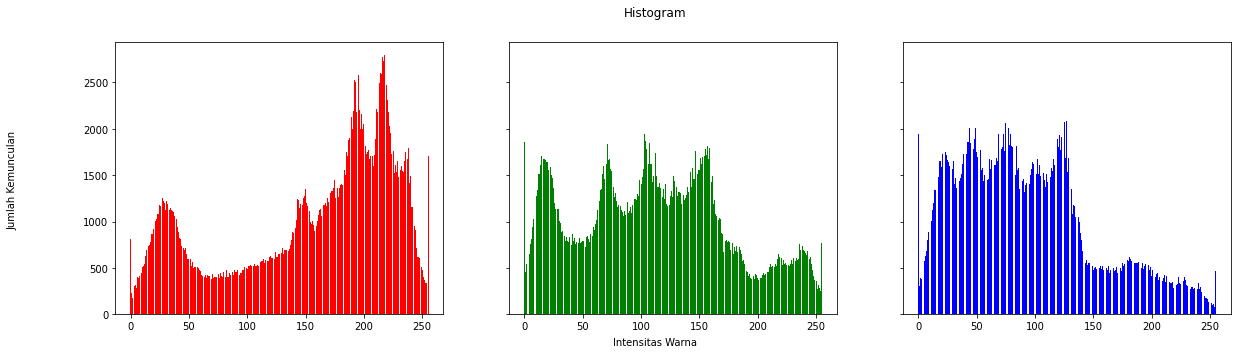

In [ ]:
# Tugas 4
# input image
img3 = cv.imread('/content/drive/MyDrive/img/lena.jpg') #input image
height, width, depth = np.shape(img3) #hitung kemunculan pixel
names = np.arange(256)

#memberi nilai awal 0 untuk sumbu y
blue = [0]*256
green = [0]*256
red = [0]*256

#membuat histogram dengan x sbg height / intensitas warna dan y sbg jmlah kemunculan
for y in range(0,height):
  for x in range(0,width):
    blue[img_l[y][x][0]] += 1 #menambahkan 1 jika ada angka tsb
    green[img_l[y][x][1]] += 1
    red[img_l[y][x][2]] += 1

#menampilkan histogram citra
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

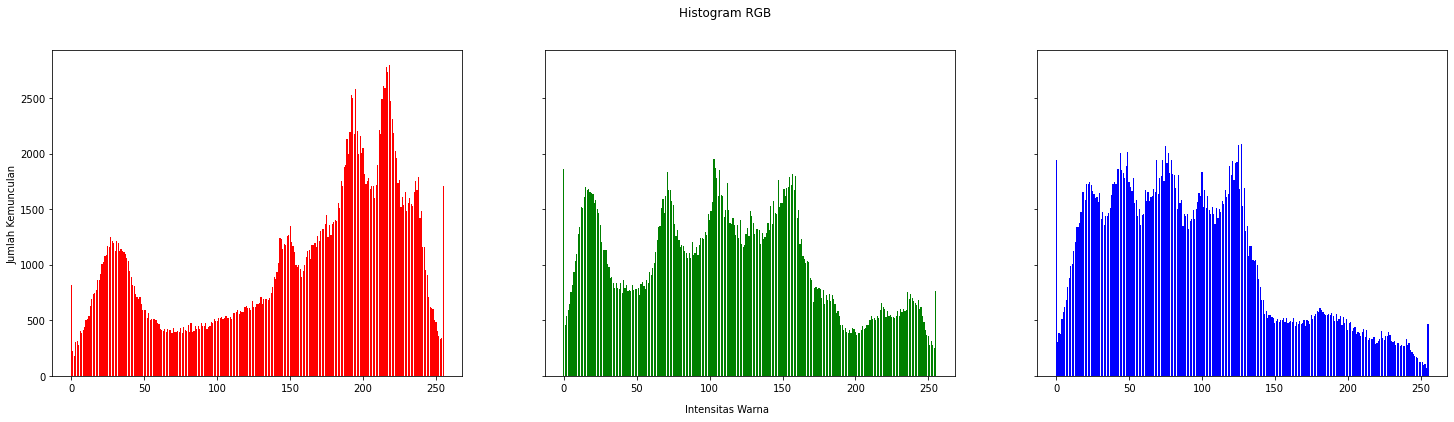

In [ ]:
# Tugas No 5
# Read gambar
image = cv.imread('/content/drive/MyDrive/img/lena.jpg')

# Menghitung histogram warna menggunakan np.histogram
red, bins = np.histogram(image[:,:,2], bins=256, range=(0, 256))
green, bins = np.histogram(image[:,:,1], bins=256, range=(0, 256))
blue, bins = np.histogram(image[:,:,0], bins=256, range=(0, 256))

# Membuat plot histogram
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[25,6], sharex=True, sharey=True)
fig.suptitle('Histogram RGB ')
fig.text(0.1, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

# Menampilkan plot histogram
plt.show()


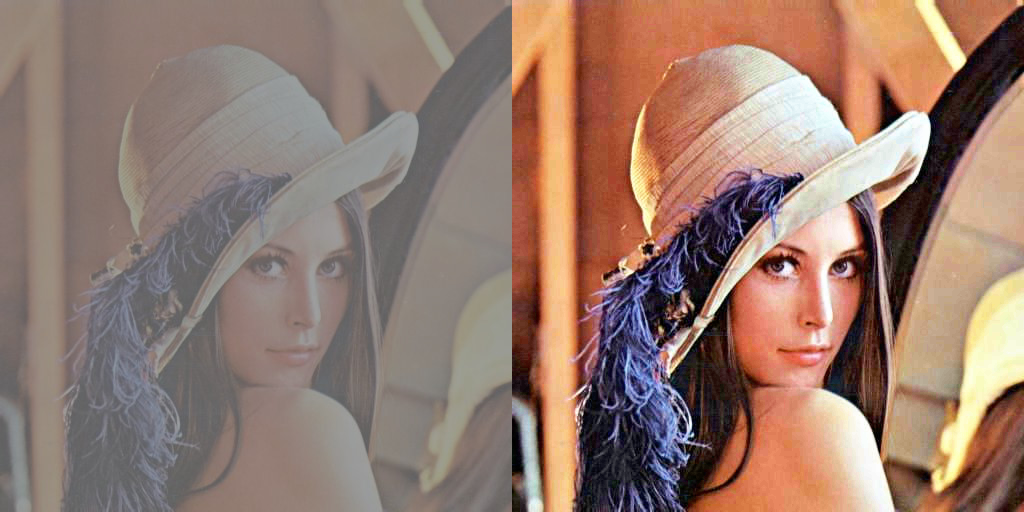

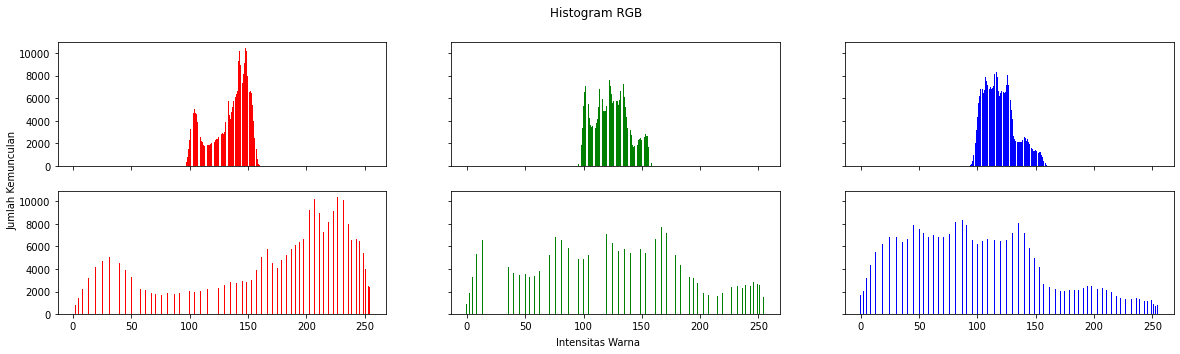

In [ ]:
# Tugas 6
img6 = cv.imread('/content/drive/MyDrive/img/lena_lc.jpg') 
def histog(img6):
  height, width, depth = np.shape(img6) # mengetahui tinggi lebar dan kedalaman
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img6[y][x][0]] += 1 # untuk menghitung banyaknya angka yg sama
      ax[1][img6[y][x][1]] += 1
      ax[2][img6[y][x][2]] += 1 
  return ax

histo_asli = histog(img6) 

#convert to Numpy array 
img_array = np.asarray(img6)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img6, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = (blue == green).all() and (green == red).all()
if (isgrayimg == False).any():
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB ') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

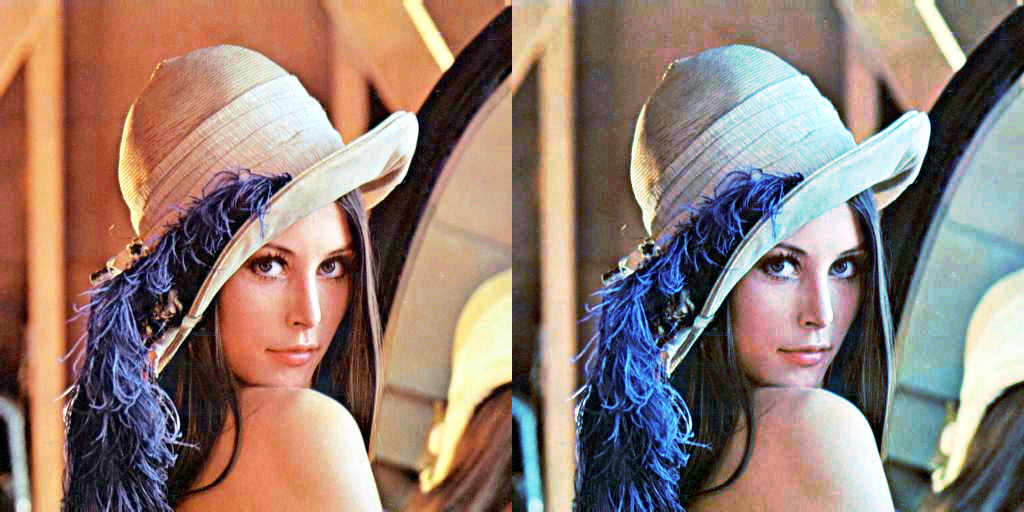

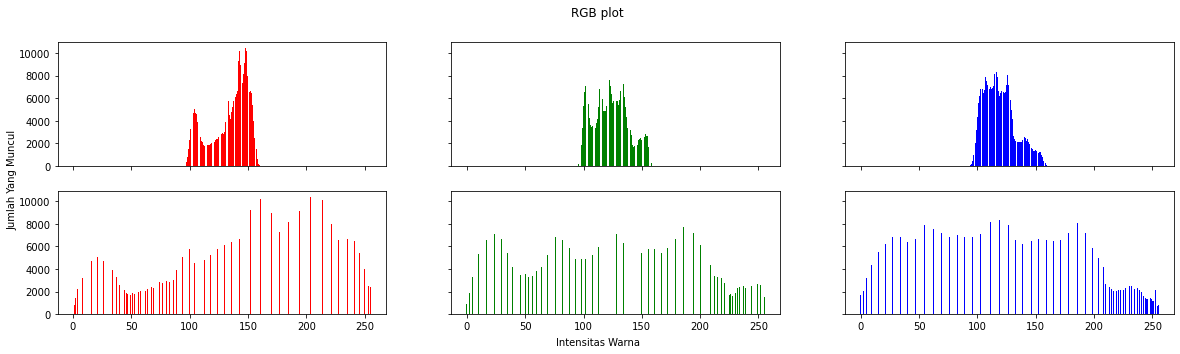

In [ ]:
# Tugas 7
channels = cv.split(img7)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)


final_frame = cv.hconcat((img7, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = (blue == green).all() and (green == red).all()
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='red')
  axs[0,1].bar(names, real_hist[1], color='green')
  axs[0,2].bar(names, real_hist[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

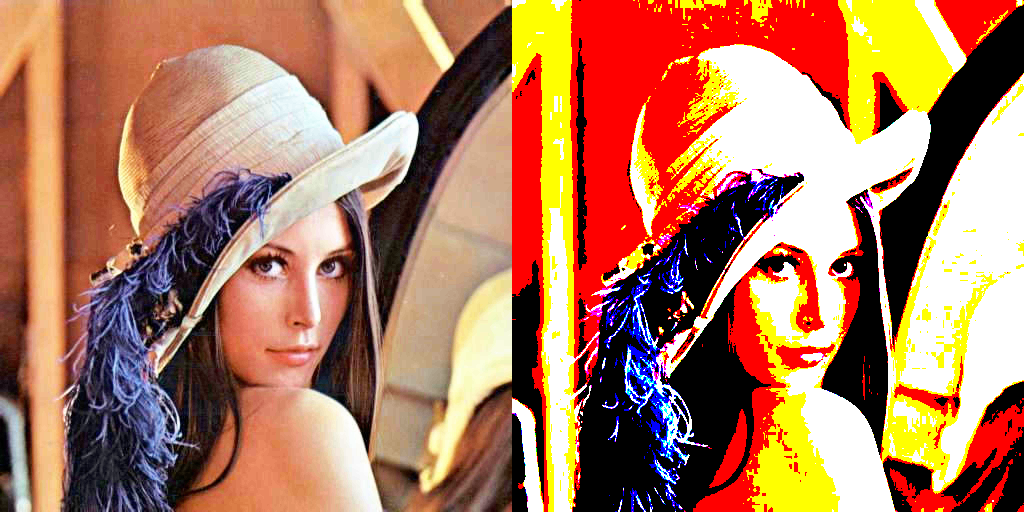

In [ ]:
# Tugas 8
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img8, img9))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/img/lena.jpg', img9)

def closestColour (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img8 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
img9 = np.zeros(img8.shape, img8.dtype)

for y in range(0, img8.shape[0]):
  for x in range(0, img8.shape[1]):
    baru = closestColour(img8[y, x, 0], img8[y, x, 1], img8[y, x, 2])
    img9[y, x] = warnaPallette[baru]
    


Gambar Asli


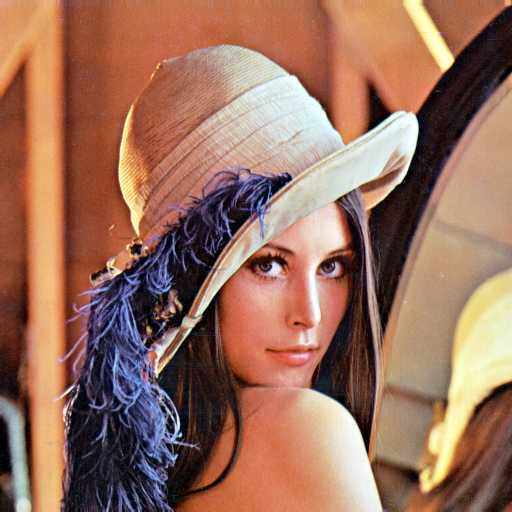


Hasil Dithering dengan jarak tetangga 1 pixel


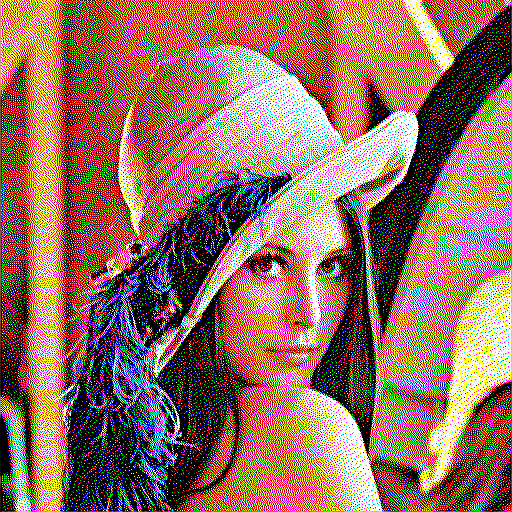

In [ ]:
# Tugas 9
input_image = cv.imread('/content/drive/MyDrive/img/lena9.jpg')
output_image = input_image.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]
     
    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            old_b = img[y, x, 0]
            old_g = img[y, x, 1]
            old_r = img[y, x, 2]
            
            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new_b = np.round(jarakPixel * old_b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * old_g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * old_r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1, 0] = minmax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = minmax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = minmax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)
            
            img[y+1, x-1, 0] = minmax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = minmax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = minmax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            img[y+1, x, 0] = minmax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = minmax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = minmax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)


            img[y+1, x+1, 0] = minmax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = minmax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = minmax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

output_image = dithering_color(output_image, 1)
print("Gambar Asli")
cv2_imshow(input_image)
print("\nHasil Dithering dengan jarak tetangga 1 pixel")
cv2_imshow(output_image)

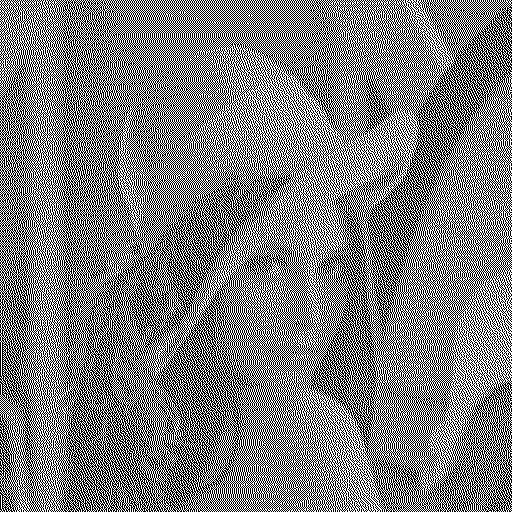

In [ ]:
# Tugas 10

from PIL import Image
import cv2

imageLena = Image.open('/content/drive/MyDrive/img/lena_lc2.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageLena.save('/content/drive/MyDrive/img/lena_lc2.jpg')


Image = cv2.imread('/content/drive/MyDrive/img/lena_lc2.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/img/lena_lc2.jpg')
image_2 = cv.cvtColor(Image2, cv.COLOR_BGR2RGB)

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/img/lena_lc2.jpg', FloydSteinberg)


# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = FloydSteinberg[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = FloydSteinberg[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= FloydSteinberg[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = FloydSteinberg[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x+1] = NewNumber

# cv2.imshow(Image)
cv2.imwrite('/content/drive/MyDrive/img/lena_lc2.jpg', FloydSteinberg)


cv2_imshow(FloydSteinberg)